# Exploratory data analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
# Load data
fake_news_df = pd.read_csv('../data/raw/fake.csv')
true_news_df = pd.read_csv('../data/raw/true.csv')

In [3]:
# Explore fake news data
fake_news_df.info()
fake_news_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Missing values
print(fake_news_df.isnull().sum())
print(f'Duplicates: {fake_news_df.duplicated().sum()}')
fake_news_df.drop_duplicates(inplace=True)

title      0
text       0
subject    0
date       0
dtype: int64
Duplicates: 3


In [5]:
# True news data exploration can be done similarly
true_news_df.info()
true_news_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
true_news_df.isnull().sum()
print(f'Duplicates: {true_news_df.duplicated().sum()}')
true_news_df.drop_duplicates(inplace=True)

Duplicates: 206


In [7]:
fake_news_df['label'] = 0
true_news_df['label'] = 1   

df = pd.concat([fake_news_df, true_news_df]).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   label    44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
print(df['title'].isnull().sum())
print(df['text'].isnull().sum())
df[df['text'] == ' ']

0
0


,title,text,subject,date,label
10922,TAKE OUR POLL: Who Do You Think President Trum...,,politics,2017-05-10,0
11040,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,2017-04-26,0
11189,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,2017-04-06,0
11224,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,2017-04-02,0
11235,SHOCKER: Public School Turns Computer Lab Into...,,politics,2017-04-01,0
...,...,...,...,...,...
21823,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,2015-04-25,0
21824,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,2015-04-25,0
21854,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,2015-04-14,0
21870,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,2015-04-12,0


In [10]:
df = df.replace({'text': ' '}, np.nan)
df = df.dropna(subset=['text'])

In [11]:
print(df['subject'].unique())
df['subject'] = df['subject'].replace('politicsNews', 'politics')  # Standardize subject names

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']


<Axes: title={'center': 'Subject Distribution'}, xlabel='subject'>

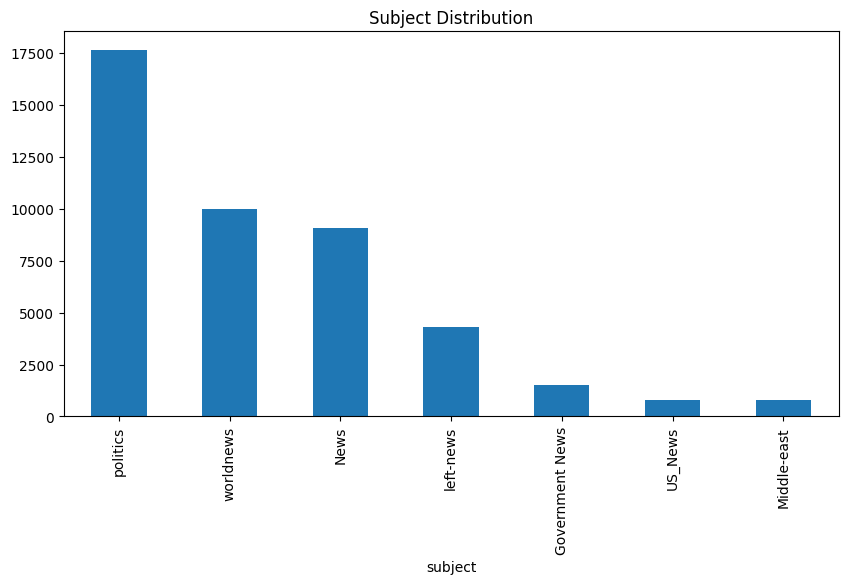

In [12]:
df['subject'].value_counts().plot(kind='bar', figsize=(10,5), title='Subject Distribution')

<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

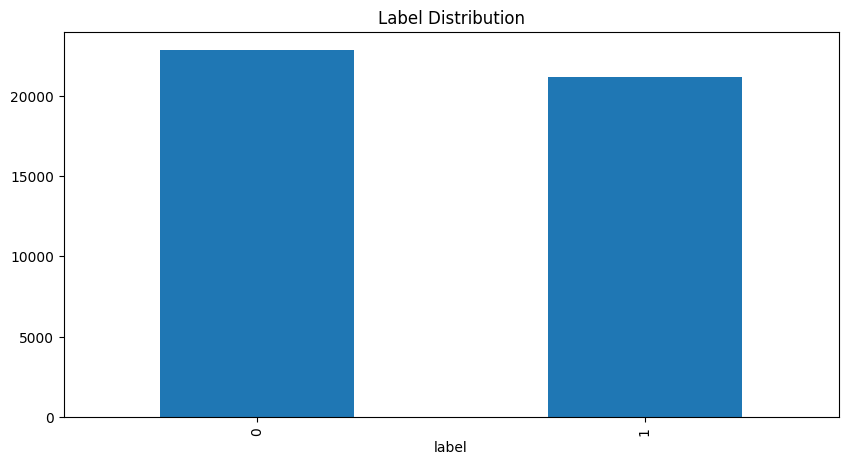

In [13]:
df['label'].value_counts().plot(kind='bar', figsize=(10,5), title='Label Distribution')

In [14]:
df.to_csv('../data/interim/interim.csv', index=False)

In [15]:
# Use spaCy for stopwords (more elegant and reliable)
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    STOPWORDS = nlp.Defaults.stop_words
    print("Using spaCy stopwords")
except OSError:
    # Fallback to sklearn stopwords
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    STOPWORDS = ENGLISH_STOP_WORDS
    print("Using sklearn stopwords")
except ImportError:
    # Final fallback to NLTK with proper error handling
    import ssl
    import os
    
    nltk_data_path = os.path.join(os.getcwd(), "nltk_data")
    nltk.data.path.append(nltk_data_path)
    
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass
    else:
        ssl._create_default_https_context = _create_unverified_https_context
    
    try:
        from nltk.corpus import stopwords
        STOPWORDS = set(stopwords.words("english"))
        print("Using NLTK stopwords")
    except LookupError:
        print("Downloading NLTK stopwords...")
        nltk.download('stopwords', download_dir=nltk_data_path, quiet=True)
        from nltk.corpus import stopwords
        STOPWORDS = set(stopwords.words("english"))
        print("Using NLTK stopwords (downloaded)")

# Split by label
fake_text = " ".join(df[df["label"] == 0]["text"].dropna().tolist())
real_text = " ".join(df[df["label"] == 1]["text"].dropna().tolist())

# Convert to lowercase
fake_text = fake_text.lower()
real_text = real_text.lower()

# Generate WordClouds
fake_wc = WordCloud(stopwords=STOPWORDS, background_color="white",
                    width=800, height=400).generate(fake_text)
real_wc = WordCloud(stopwords=STOPWORDS, background_color="white",
                    width=800, height=400).generate(real_text)




Using spaCy stopwords


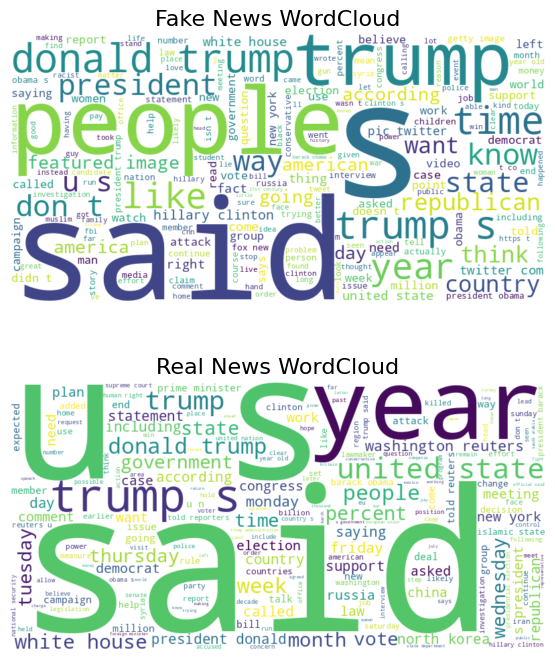

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
axes[0].imshow(fake_wc, interpolation="bilinear")
axes[0].set_title("Fake News WordCloud", fontsize=16)
axes[0].axis("off")

axes[1].imshow(real_wc, interpolation="bilinear")
axes[1].set_title("Real News WordCloud", fontsize=16)
axes[1].axis("off")

plt.subplots_adjust(hspace=0.3)
plt.show()

In [17]:
# Use spaCy for stopwords (more elegant and reliable)
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    STOPWORDS = nlp.Defaults.stop_words
    print("Using spaCy stopwords")
except OSError:
    # Fallback to sklearn stopwords
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    STOPWORDS = ENGLISH_STOP_WORDS
    print("Using sklearn stopwords")
except ImportError:
    # Final fallback to NLTK with proper error handling
    import ssl
    import os
    
    nltk_data_path = os.path.join(os.getcwd(), "nltk_data")
    nltk.data.path.append(nltk_data_path)
    
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass
    else:
        ssl._create_default_https_context = _create_unverified_https_context
    
    try:
        from nltk.corpus import stopwords
        STOPWORDS = set(stopwords.words("english"))
        print("Using NLTK stopwords")
    except LookupError:
        print("Downloading NLTK stopwords...")
        nltk.download('stopwords', download_dir=nltk_data_path, quiet=True)
        from nltk.corpus import stopwords
        STOPWORDS = set(stopwords.words("english"))
        print("Using NLTK stopwords (downloaded)")

# Split by label
fake_text = " ".join(df[df["label"] == 0]["text"].dropna().tolist())
real_text = " ".join(df[df["label"] == 1]["text"].dropna().tolist())

# Convert to lowercase
fake_text = fake_text.lower()
real_text = real_text.lower()

# Generate WordClouds
fake_wc = WordCloud(stopwords=STOPWORDS, background_color="white",
                    width=800, height=400).generate(fake_text)
real_wc = WordCloud(stopwords=STOPWORDS, background_color="white",
                    width=800, height=400).generate(real_text)

Using spaCy stopwords


In [18]:
# Save images for reports
fake_wc.to_file("../reports/images/wordcloud_fake.png")
real_wc.to_file("../reports/images/wordcloud_real.png")

In [19]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1
